In [45]:
import pandas as pd
from sklearn.cluster import KMeans
# Membaca dataset dari file CSV
data = pd.read_csv('LTE pedestrian_new2.csv')
# Mengambil fitur yang akan digunakan untuk clustering
features = ['RSRQ', 'RSRP', 'RSSI', 'SNR', 'CQI']
X = data[features]
# Menentukan jumlah cluster yang diinginkan
n_clusters = 3
# Membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Melakukan clustering pada data
kmeans.fit(X)
# Mendapatkan label cluster untuk setiap data
cluster_labels = kmeans.labels_
# Menambahkan kolom label cluster ke dalam dataset
data['Cluster'] = cluster_labels
# Menentukan kualitas jaringan berdasarkan label cluster
quality_mapping = {0: 1, 1: 2, 2: 3} # 1: Buruk, 2: Sedang, 3: Baik
data['Quality'] = data['Cluster'].map(quality_mapping)
# Menyimpan dataset yang telah diprediksi kualitasnya ke file CSV
data.to_csv('dataset_prediksi.csv', index=False)


c:\Users\O. Midiyanto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    8150
3    6758
1    3285
Name: Quality, dtype: int64


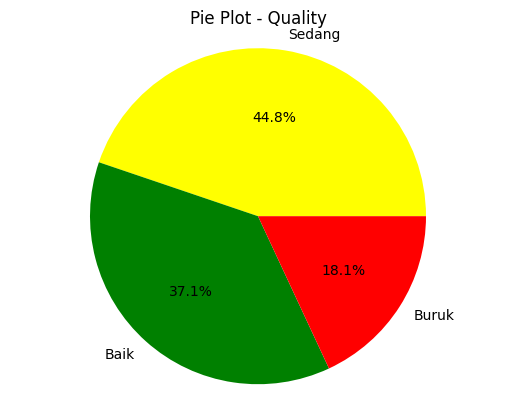

In [46]:
import matplotlib.pyplot as plt

df=pd.read_csv('dataset_prediksi.csv')
print(df['Quality'].value_counts())
# Membuat dictionary untuk memetakan nilai ke label
label_mapping = {1: 'Buruk', 2: 'Sedang', 3: 'Baik'}
# Mengubah nilai-nilai dalam kolom 'Quality' menjadi label yang diinginkan
df['Quality'] = df['Quality'].map(label_mapping)
# Menghitung frekuensi masing-masing label
counts = df['Quality'].value_counts()
# Membuat pie plot
colors = ['yellow', 'green', 'red']
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Membuat lingkaran terlihat sempurna
plt.title('Pie Plot - Quality')
# Menampilkan plot
plt.show()

In [47]:
df=pd.read_csv('dataset_prediksi.csv')
df.head()

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,path,Cluster,Quality
0,2017-11-21 15:03:58,-8.499632,51.893483,0,A,2,LTE,-102,-14,1.0,...,0,D,-106.0,-19.0,-8.491719,51.893905,545.02,pedestrian,1,2
1,2017-11-21 15:03:59,-8.499632,51.893483,0,A,2,LTE,-102,-14,1.0,...,73,D,-106.0,-19.0,-8.491719,51.893905,545.02,pedestrian,1,2
2,2017-11-21 15:04:07,-8.499632,51.893483,0,A,2,LTE,-103,-15,0.0,...,16,D,-108.0,-19.0,-8.491719,51.893905,545.02,pedestrian,1,2
3,2017-11-21 15:04:08,-8.499632,51.893483,0,A,2,LTE,-103,-15,0.0,...,0,D,-108.0,-19.0,-8.491719,51.893905,545.02,pedestrian,1,2
4,2017-11-21 15:04:09,-8.499632,51.893483,0,A,2,LTE,-105,-17,-4.0,...,13,D,-105.0,-15.0,-8.491719,51.893905,545.02,pedestrian,1,2


In [48]:
import folium

# Membuat peta awal dengan koordinat tengah berdasarkan rata-rata longitude dan latitude
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Menentukan rentang nilai Quality untuk mengkategorikan kualitas jaringan
quality_thresholds = [1, 2, 3]  # Ubah nilai ambang sesuai kebutuhan Anda
colors = ['green', 'yellow', 'red']

# Menambahkan penanda pada peta untuk setiap titik koordinat
for index, row in df.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    quality = row['Quality']
    
    # Menentukan warna berdasarkan nilai quality
    color = colors[0]
    for i in range(len(quality_thresholds)):
        if quality >= quality_thresholds[i]:
            color = colors[i]
    
    # Menambahkan penanda pada peta dengan warna yang sesuai
    folium.CircleMarker([lat, lon], radius=5, color='black', fill=True, fill_color=color, fill_opacity=0.7).add_to(map)

# Menampilkan peta
map.save('network_quality_map.html')
